In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import sys
sys.path.append('../../modules')
from helper_functions import feature_reduction_x, rating_feature_conversion, heatmap


from datetime import datetime


In [3]:
#balanced_dataset = '/../../data/training/ber-rating-dataset-final.csv' # final balanced dataset
balanced_dataset = '../../data/training/ber-rating-dataset-final-split_0.csv' # 1st split of balanced dataset
balanced_dataset_1 = '../../data/training/ber-rating-dataset-final-split_1.csv' # 1st split of balanced dataset
balanced_dataset_2 = '../../data/training/ber-rating-dataset-final-split_2.csv' # 2nd split of balanced dataset
balanced_dataset_3 = '/../../data/training/ber-rating-dataset-final-split_3.csv' # 3rd split of balanced dataset

#current_folder = os.path.abspath('.')

df = pd.read_table(balanced_dataset, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
df_1 = pd.read_table(balanced_dataset_1, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
df_2 = pd.read_table(balanced_dataset_2, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
#df_3 = pd.read_table(current_folder + balanced_dataset_3, sep=";", encoding='cp437', header=0, on_bad_lines="warn")

df = pd.concat([df, df_2, df_1], ignore_index=True, sort=False)

/var/folders/nj/kdpjd7j978g0r39qfsf_wr480000gn/T/ipykernel_30429/2375247643.py:10: DtypeWarning: Columns (156,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_table(balanced_dataset_1, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
/var/folders/nj/kdpjd7j978g0r39qfsf_wr480000gn/T/ipykernel_30429/2375247643.py:11: DtypeWarning: Columns (156,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_table(balanced_dataset_2, sep=";", encoding='cp437', header=0, on_bad_lines="warn")


In [4]:
#df = pd.read_csv("https://github.com/jbyrneirl/BER-Rating-AI-Model/raw/main/data/training/ber-rating-dataset-final-split_0.csv", sep=';', on_bad_lines="skip", low_memory=False)

#df = pd.read_csv("https://github.com/jbyrneirl/BER-Rating-AI-Model/raw/main/data/training/BERRating_test_data.csv", sep=';', on_bad_lines="skip", low_memory=False)

np.random.seed(0)

X = feature_reduction_x(df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
y = df.BerRating


X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=2)

/Users/igor/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 55 111 112 113 119 120 121] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/igor/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [5]:
start_time = datetime.now()
model = Ridge()
model.fit(X_train , y_train)
y_hat = model.predict(X_test)
end_time = datetime.now()

score = model.score(X_test, y_test)



y_con = rating_feature_conversion(y_test.to_numpy())

Score:  0.8228689094449618 

0.42912986824960186
Processing Time: 0:00:00.096754


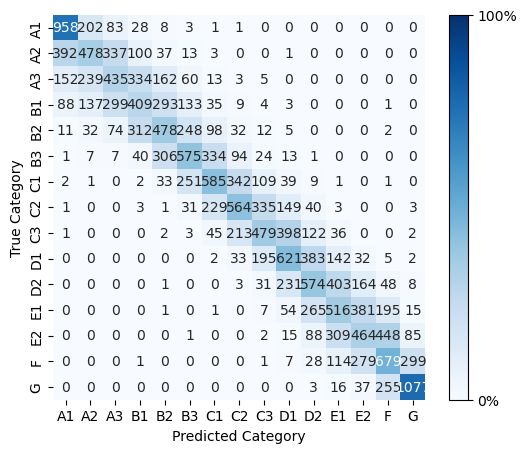

              precision    recall  f1-score   support

          A1       0.60      0.75      0.66      1284
          A2       0.44      0.35      0.39      1361
          A3       0.35      0.31      0.33      1403
          B1       0.33      0.29      0.31      1411
          B2       0.36      0.37      0.36      1304
          B3       0.44      0.41      0.42      1402
          C1       0.43      0.43      0.43      1375
          C2       0.44      0.42      0.43      1359
          C3       0.40      0.37      0.38      1301
          D1       0.40      0.44      0.42      1415
          D2       0.38      0.39      0.39      1463
          E1       0.34      0.36      0.35      1435
          E2       0.34      0.33      0.34      1412
           F       0.42      0.48      0.45      1408
           G       0.72      0.78      0.75      1388

    accuracy                           0.43     20721
   macro avg       0.43      0.43      0.43     20721
weighted avg       0.42   

In [6]:
print("Score: ", score, "\n")

y_hat_con = rating_feature_conversion(y_hat)
cm = confusion_matrix(y_con, y_hat_con)


#print("CM")
#print(cm)

print(accuracy_score(y_con, y_hat_con))

print('Processing Time: {}'.format(end_time - start_time))

heatmap(cm)

print(classification_report(y_con, y_hat_con))

In [7]:
from scipy.special import softmax
from helper_functions import feature_reduction_y_grid

#X2 = feature_reduction_y_grid(df)
#imp.fit(X2)
#X2 = imp.transform(X2)

y2 = df.EnergyRating
y_grid = pd.get_dummies(y2)
#softmax(X, y2, Ridge())
#X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y_grid, random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split( X, y_grid, random_state=2)

start_time2 = datetime.now()
model = Ridge()
model.fit(X2_train , y2_train)
y_hat2 = model.predict(X2_test)
y_hat_bal = pd.DataFrame(softmax(y_hat2, axis=1), columns = y_grid.columns)
#print(y_hat_bal)
y_true_hat = y_hat_bal.idxmax(axis=1)
end_time2 = datetime.now()
#print(y_hat_bal.idxmax(axis=1))

In [8]:
#Using softmax
#print(y2_test.idxmax(axis=1))
#print(y_true_hat)
y2_test_con = y2_test.idxmax(axis=1)

cm2 = confusion_matrix(y2_test_con, y_true_hat)

print("CM")
print(cm2)

print(accuracy_score(y2_test_con, y_true_hat))

print('Processing Time: {}'.format(end_time2 - start_time2))

CM
[[1075  137   39   30    3    0    0    0    0    0    0    0    0    0
     0]
 [ 116 1117  100   26    2    0    0    0    0    0    0    0    0    0
     0]
 [ 337  406  434  186   37    2    0    0    0    0    0    0    0    0
     0]
 [ 222   41  213  616  267   43    6    1    2    0    0    1    0    0
     0]
 [ 130   14   80  425  318  280   37    2    7   10    0    1    0    0
     0]
 [ 111   13   41  245  229  461  221   27   44    6    0    3    1    0
     0]
 [  90   27   27  118  127  324  387   86  138   23    7    8    7    0
     6]
 [  76    5   29   94   47  207  356  137  304   30    5   32   17    1
    18]
 [  63    2   14   57   31   91  263  121  418   54   33   35   48   14
    58]
 [  56    0   20   38   15   37  149   89  435   99   68   55  141   54
   159]
 [  20    3   12   11    1   11   56   38  344   99   80   60  279  130
   319]
 [  12    2   16    5    1    2   19   15  170   67   53   67  297  243
   466]
 [   5    2    4    0    0    3   13 